### jeju guest consumption
제주 관광객의 소비업종

제주 읍면동별 세대 및 인구 데이터 참고
https://kosis.kr/statHtml/statHtml.do?orgId=218&tblId=DT_21801N002<br>
소상공인 시장진흥공단_상가(상권)정보 - 제주

In [1]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import folium
from matplotlib import font_manager, rc
from pyproj import Proj, transform

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.unicode_minus'] = False

# 한글 설정
f_path = "/Users/seyoung/Library/Fonts/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
import os

In [2]:
admin_district_url = '../datas/jeju_district.csv'
district = pd.read_csv(admin_district_url, sep=',', encoding='utf-8', names=['sigungu', 'dong'])
district.tail(2)

,sigungu,dong
41,서귀포시,중문동
42,서귀포시,예래동


In [3]:
admin_district_pivot = district.pivot_table(index='sigungu', values='dong', aggfunc=lambda x: ' '.join(x))
# admin_district_pivot.reset_index(inplace=True, drop=True)
admin_district_pivot

,dong
sigungu,
서귀포시,대정읍 남원읍 성산읍 안덕면 표선면 송산동 정방동 중앙동 천지동 효돈동 영천동 동홍...
제주시,한림읍 애월읍 구좌읍 조천읍 한경면 추자면 우도면 일도1동 일도2동 이도1동 이도2...


In [4]:
consumption_url = '../datas/detailed_consume_type_data.csv'
consumption = pd.read_csv(consumption_url, sep=',', encoding='utf-8')

# 관광객 11개 주 소비 업종 
tour_types= ['1급호텔', '2급호텔', '렌트카', '면세점', '여객선', '콘도', '특급호텔', '항공사']
data_tour = consumption.loc[consumption.Type.isin(tour_types)]
data_tour.tail(3)

,YM,Sido,Sigungu,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,LargeCategory,MediumCategory
272845,202005,제주특별자치도,서귀포시,일반,콘도,x시,56400,0,1,0,927857.0808,1485406.856,숙박업,휴양콘도 운영업
272883,202005,제주특별자치도,서귀포시,일반,콘도,x시,201000,0,2,0,934082.9022,1479488.988,숙박업,휴양콘도 운영업
273136,202005,제주특별자치도,서귀포시,일반,콘도,x시,122800,0,3,0,946762.1456,1493244.350,숙박업,휴양콘도 운영업


In [5]:
consumption.tail(3)

,YM,Sido,Sigungu,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,LargeCategory,MediumCategory
273180,202005,제주특별자치도,제주시,영세,편의점,x시,4800,0,1,0,950266.5976,1502457.688,소매업,체인화 편의점
273181,202005,제주특별자치도,제주시,중소,제과점,x시,25000,0,2,0,950524.6587,1500759.566,소매업,빵 및 과자류 소매업
273182,202005,제주특별자치도,제주시,영세,서양음식,x시,6000,0,1,0,950674.5989,1500760.286,음식점업,서양식 음식점업


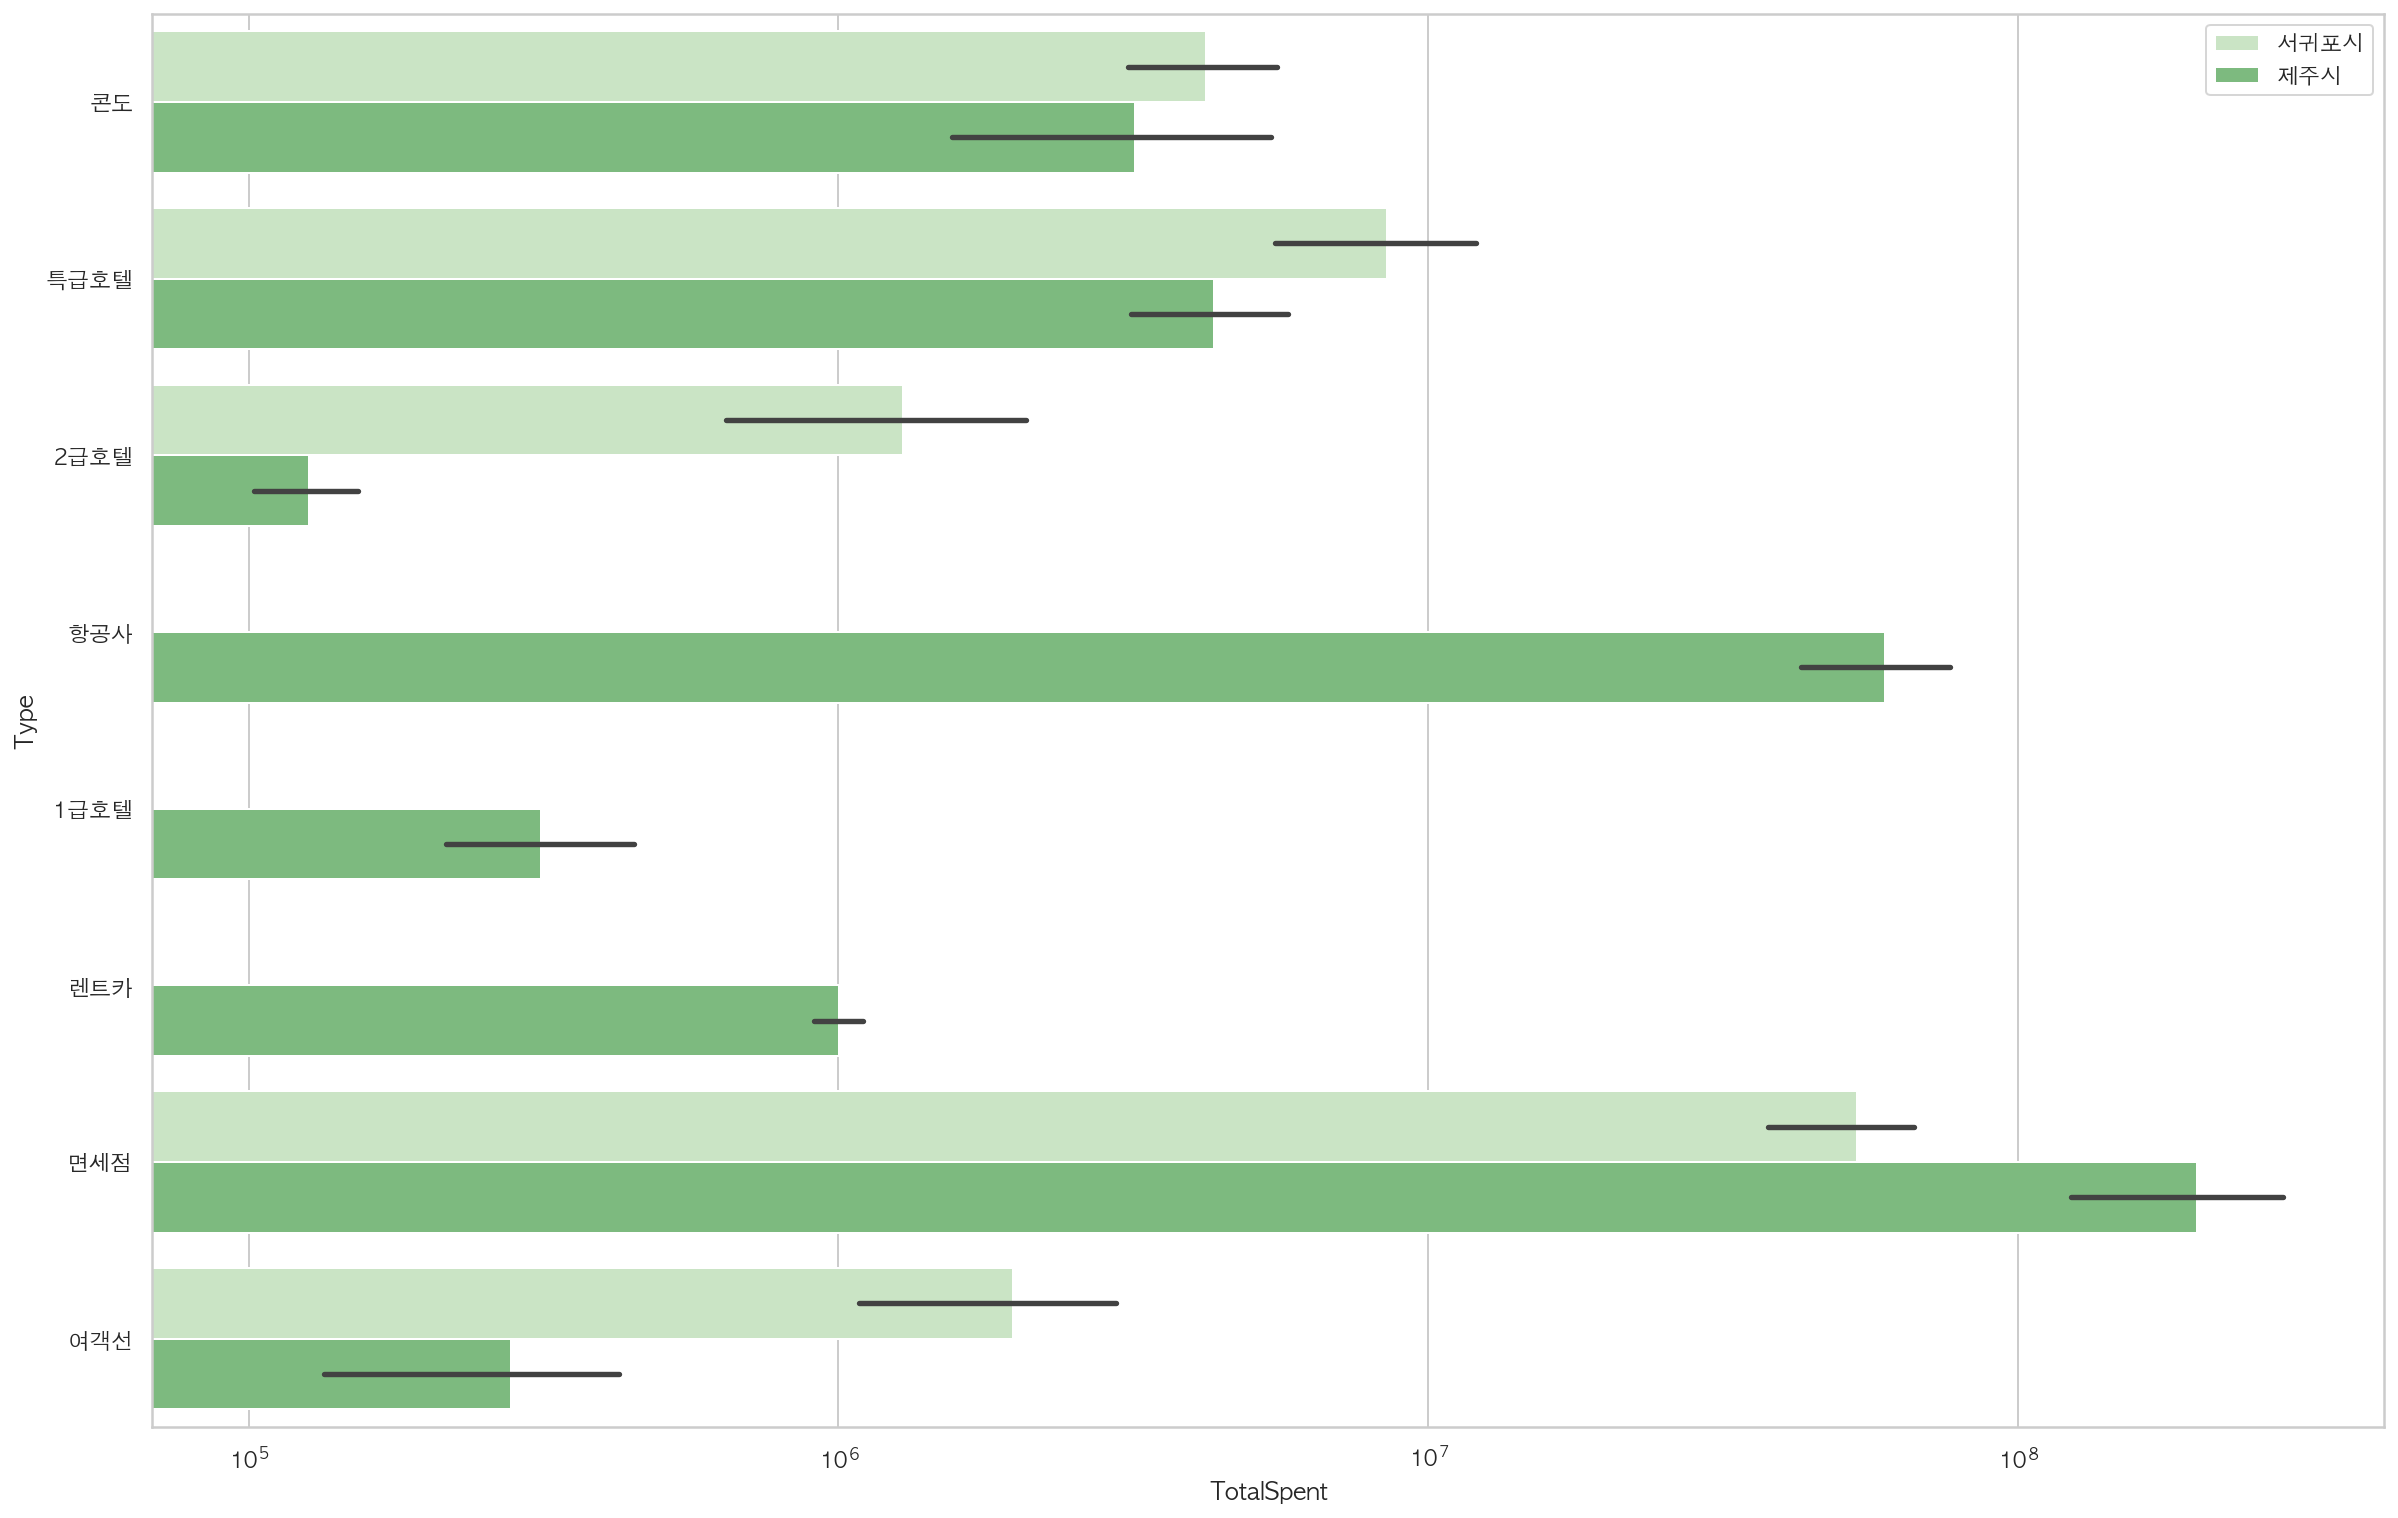

In [7]:
sigungu_1 = data_tour.loc[data_tour.Sigungu.isin(['서귀포시'])]
sigungu_2 = data_tour.loc[data_tour.Sigungu.isin(['제주시'])]

sns.set(rc={'axes.unicode_minus':False}, font='AppleGothic', style='whitegrid')
sns.set_palette('Greens', 3)

plt.figure(figsize=(20,13))
sns.barplot(x='TotalSpent', y='Type', hue='Sigungu', data=data_tour, log='y')

plt.legend()
plt.show()

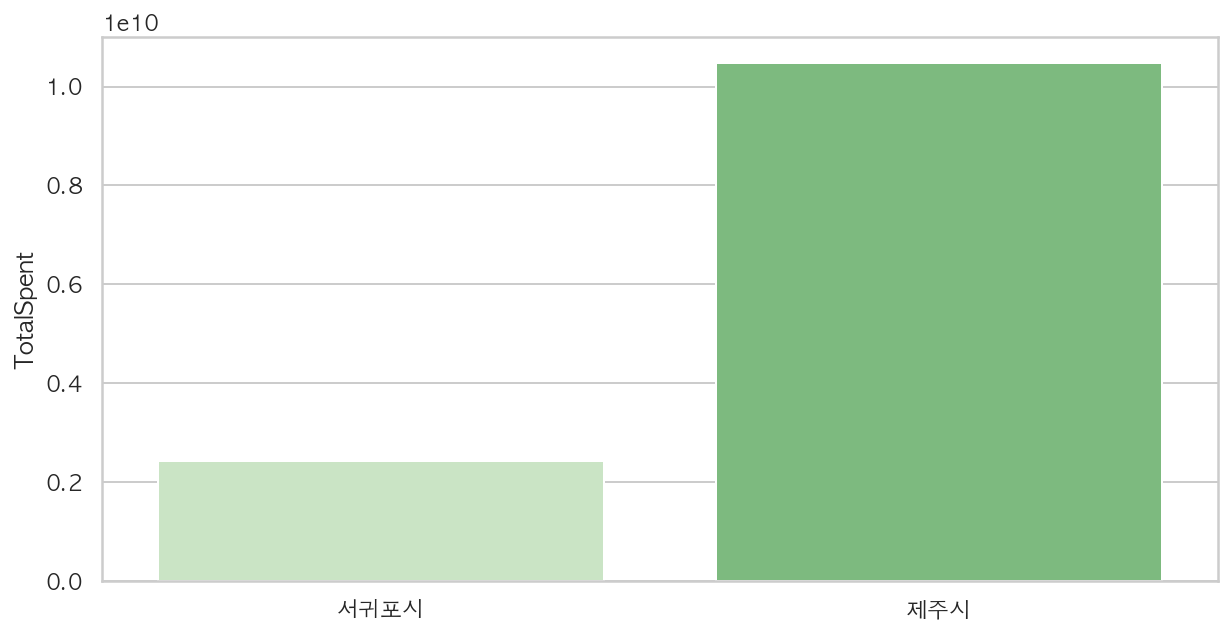

In [8]:
datatour_pivot = data_tour.pivot_table(index='Sigungu', values=['TotalSpent', 'Type'], aggfunc='sum')

sns.set(rc={'axes.unicode_minus':False}, font='AppleGothic', style='whitegrid')
sns.set_palette('Greens', 3)

plt.figure(figsize=(10,5))
sns.barplot(x=datatour_pivot.index.tolist(), y='TotalSpent', data=datatour_pivot)

plt.show()

In [9]:
datatour_pivot.astype(str)
datatour_pivot['TotalSpent']= datatour_pivot['TotalSpent'].astype(int)
datatour_pivot

,TotalSpent
Sigungu,
서귀포시,2411916254
제주시,10479169763


In [10]:
jejusi = pd.read_csv('../datas/guest_consumptionType_jejusi.csv', sep=',', encoding='utf-8')
jejusi['Dong'].dropna()
jejusi = jejusi.iloc[:, 2:]
jejusi = jejusi.reindex()

# x시 제거
drop_target = jejusi[jejusi['Time']=='x시'].index.tolist()
jejusi = jejusi.drop(index=drop_target)
jejusi.tail(3)

,YM,Sido,Sigungu,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,LargeCategory,MediumCategory,Proj_X,Proj_Y,Dong
6276,202005,제주특별자치도,제주시,영세,기타숙박업,23시,280000,0,1,0,940815.8569,1503361.925,숙박업,여관업,126.860550,33.523305,구좌읍
6277,202005,제주특별자치도,제주시,영세,기타숙박업,23시,6000,0,1,0,940964.1145,1503712.502,숙박업,여관업,126.862124,33.526475,구좌읍
6278,202005,제주특별자치도,제주시,중소2,기타숙박업,23시,234000,0,1,0,942360.9005,1504269.001,숙박업,여관업,126.877129,33.531570,구좌읍


<Figure size 2160x5616 with 0 Axes>

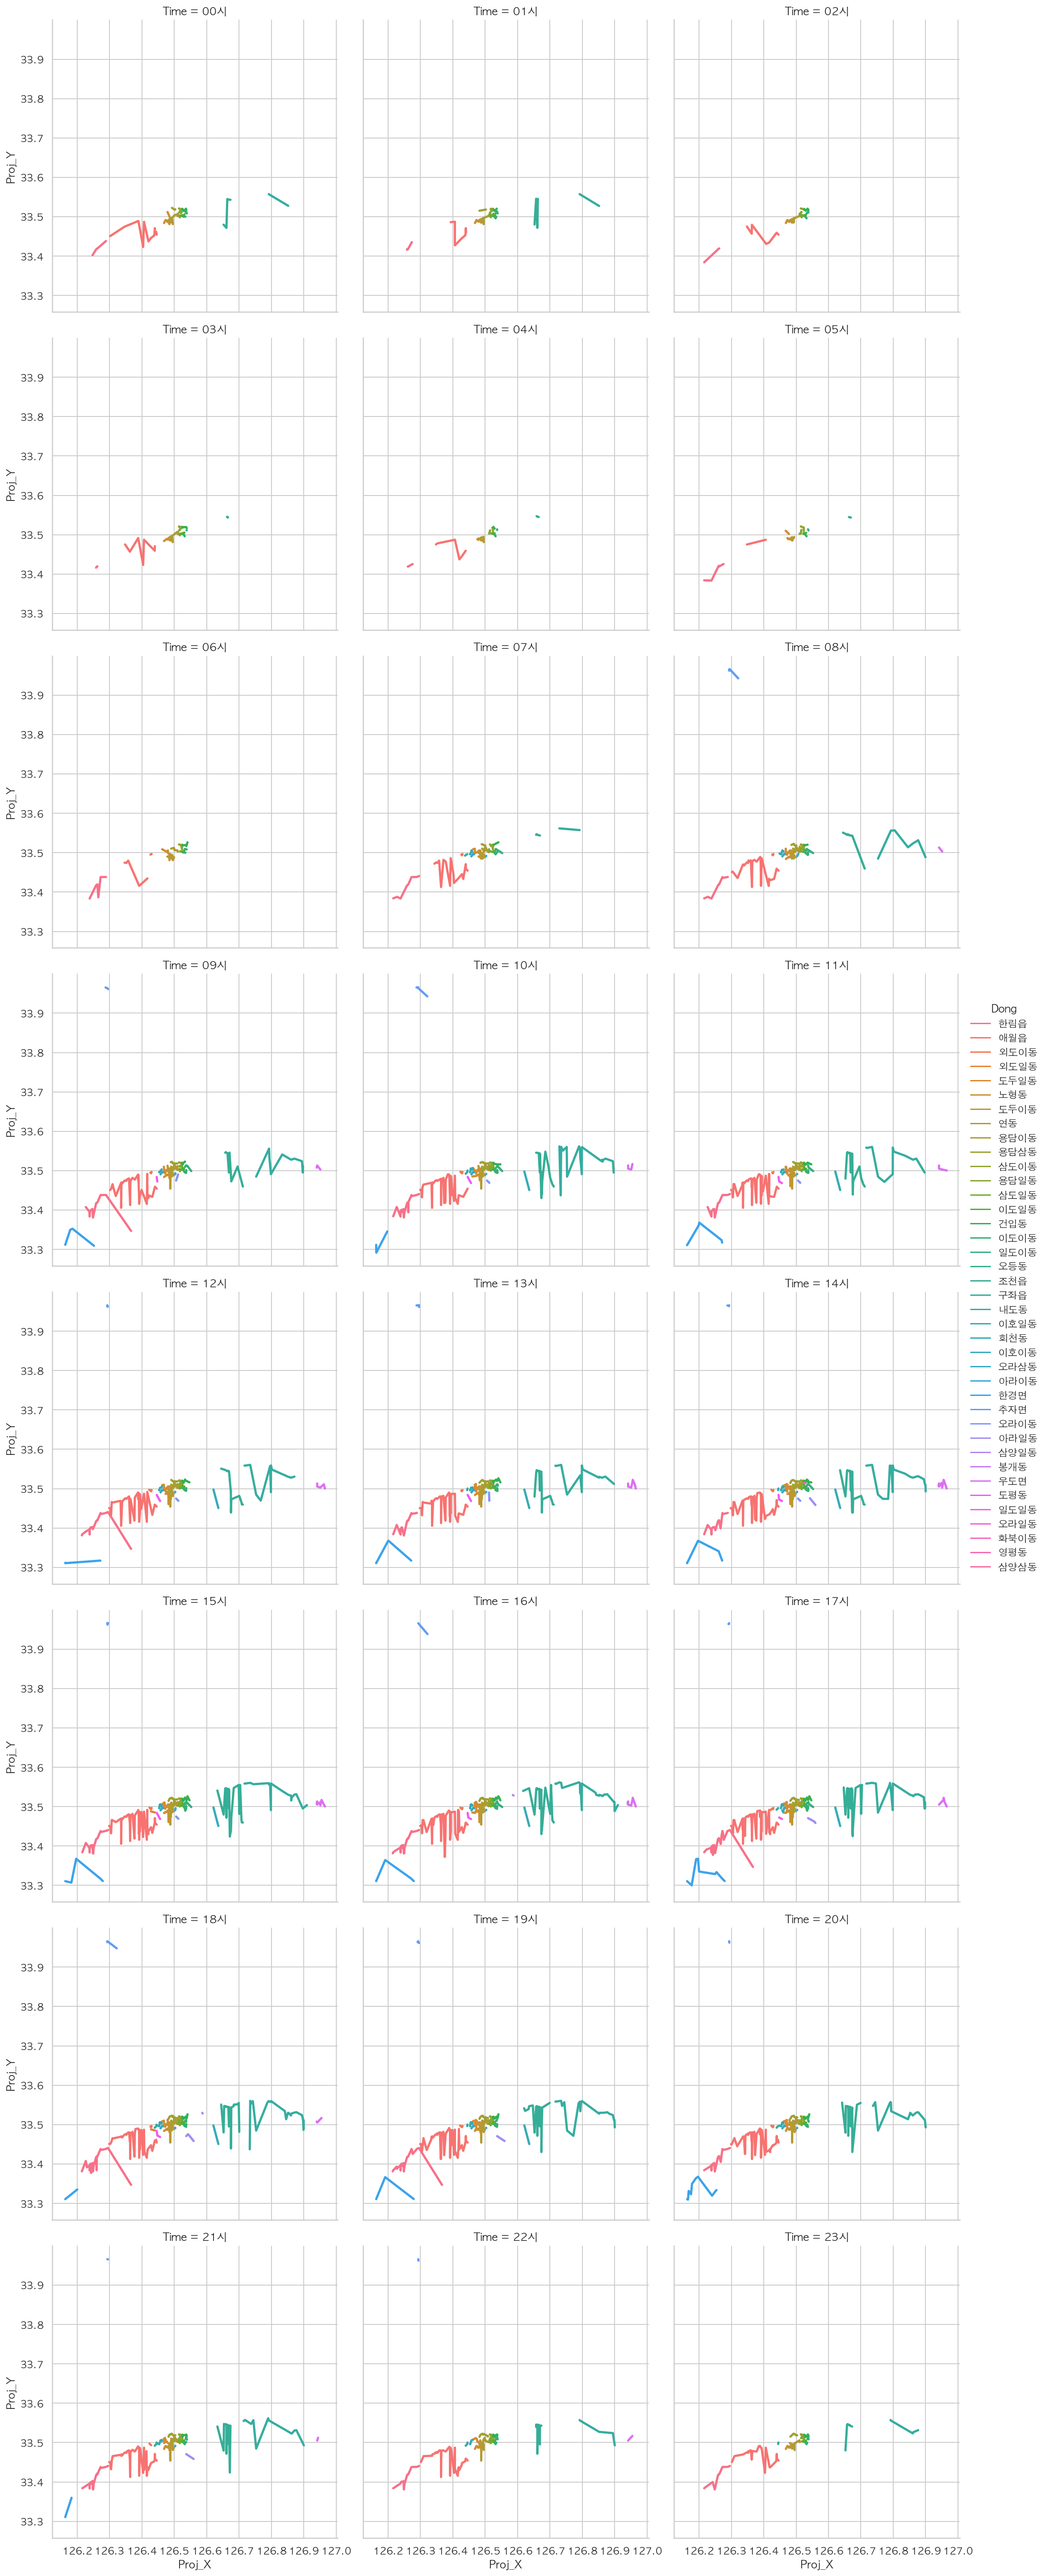

In [11]:
plt.figure(figsize=(30,78))
sns.set(rc={'axes.unicode_minus':False}, font='AppleGothic', style='whitegrid')
sns.set_palette('Greens', 3)

sns.relplot(x='Proj_X', y='Proj_Y', hue='Dong', col='Time', kind='line',
            col_wrap=3, height=5, linewidth=2.5, data=jejusi)
# sns.scatterplot(x='Proj_X', y='Proj_Y', data=datas);

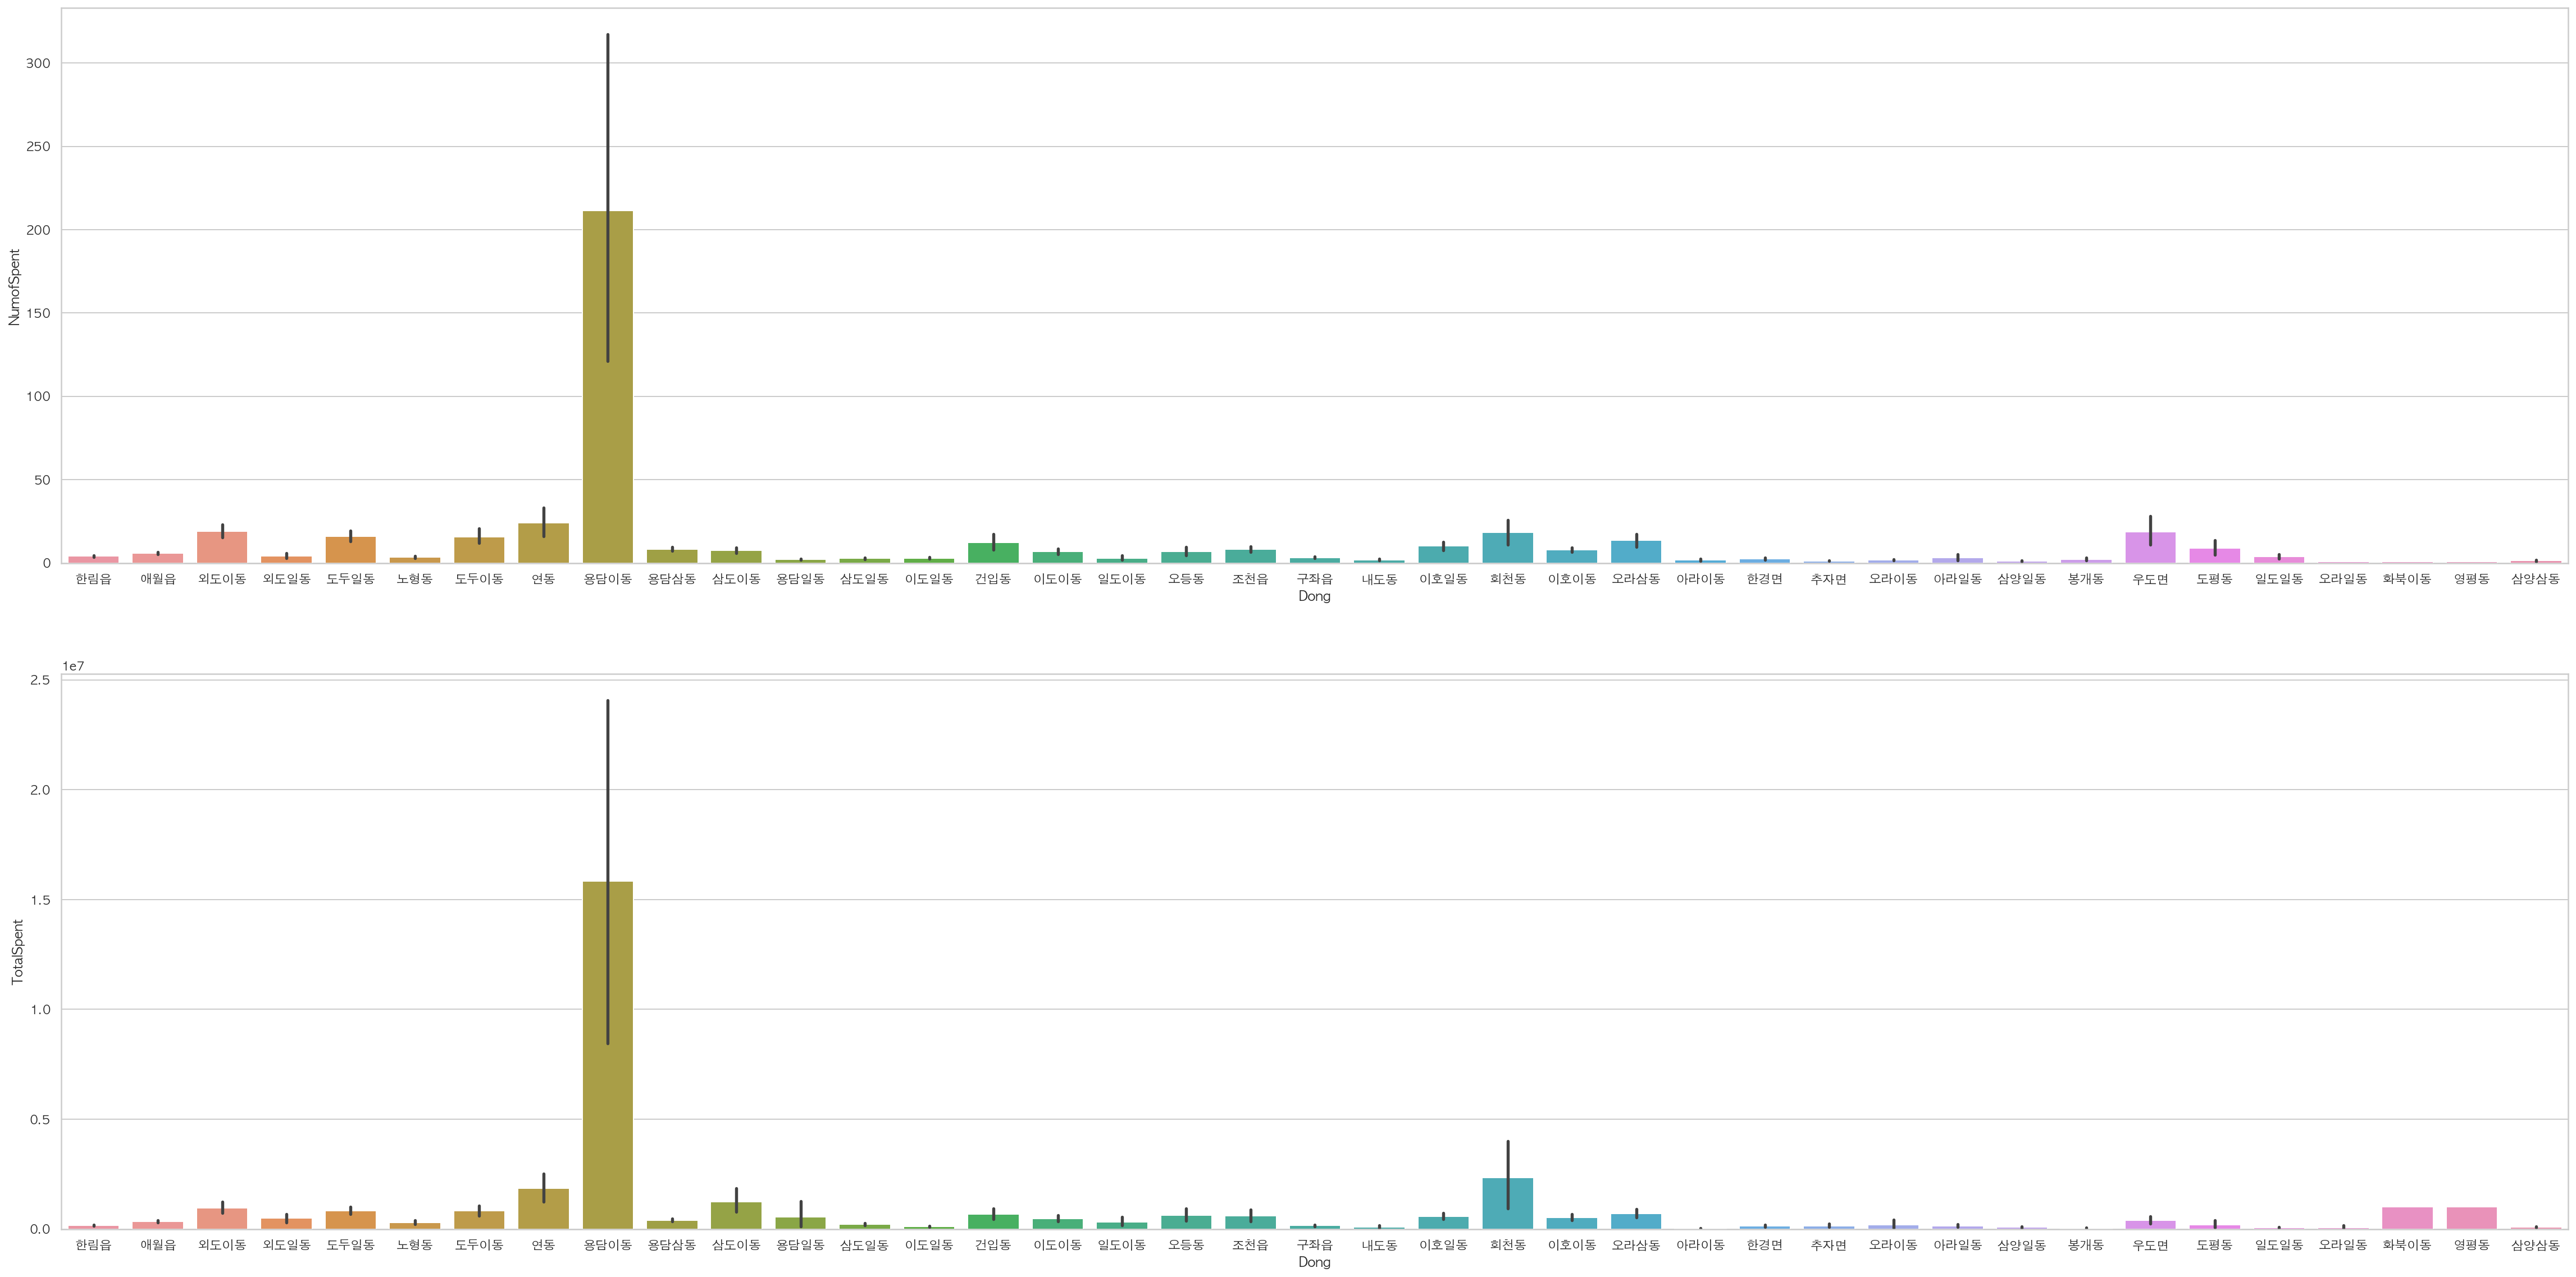

In [12]:
# 제주시 동별 관광객 주업종 NumofSpent, TotalSpent
sns.set(rc={'axes.unicode_minus':False}, font='AppleGothic', style='whitegrid')
fig, axes = plt.subplots(2,1, figsize=(40,20))
sns.set_palette('Greens', 3)

sns.barplot(ax=axes[0], x='Dong', y='NumofSpent', data=jejusi)
sns.barplot(ax=axes[1], x='Dong', y='TotalSpent', data=jejusi)
plt.show()

- 제주시 용담이동에는 공항이 있어 '면세점' 업종과 '항공' 업종의 관광객 소비가 월등히 많다.
- 용담이동을 제외한 나머지 제주시 동별 소비

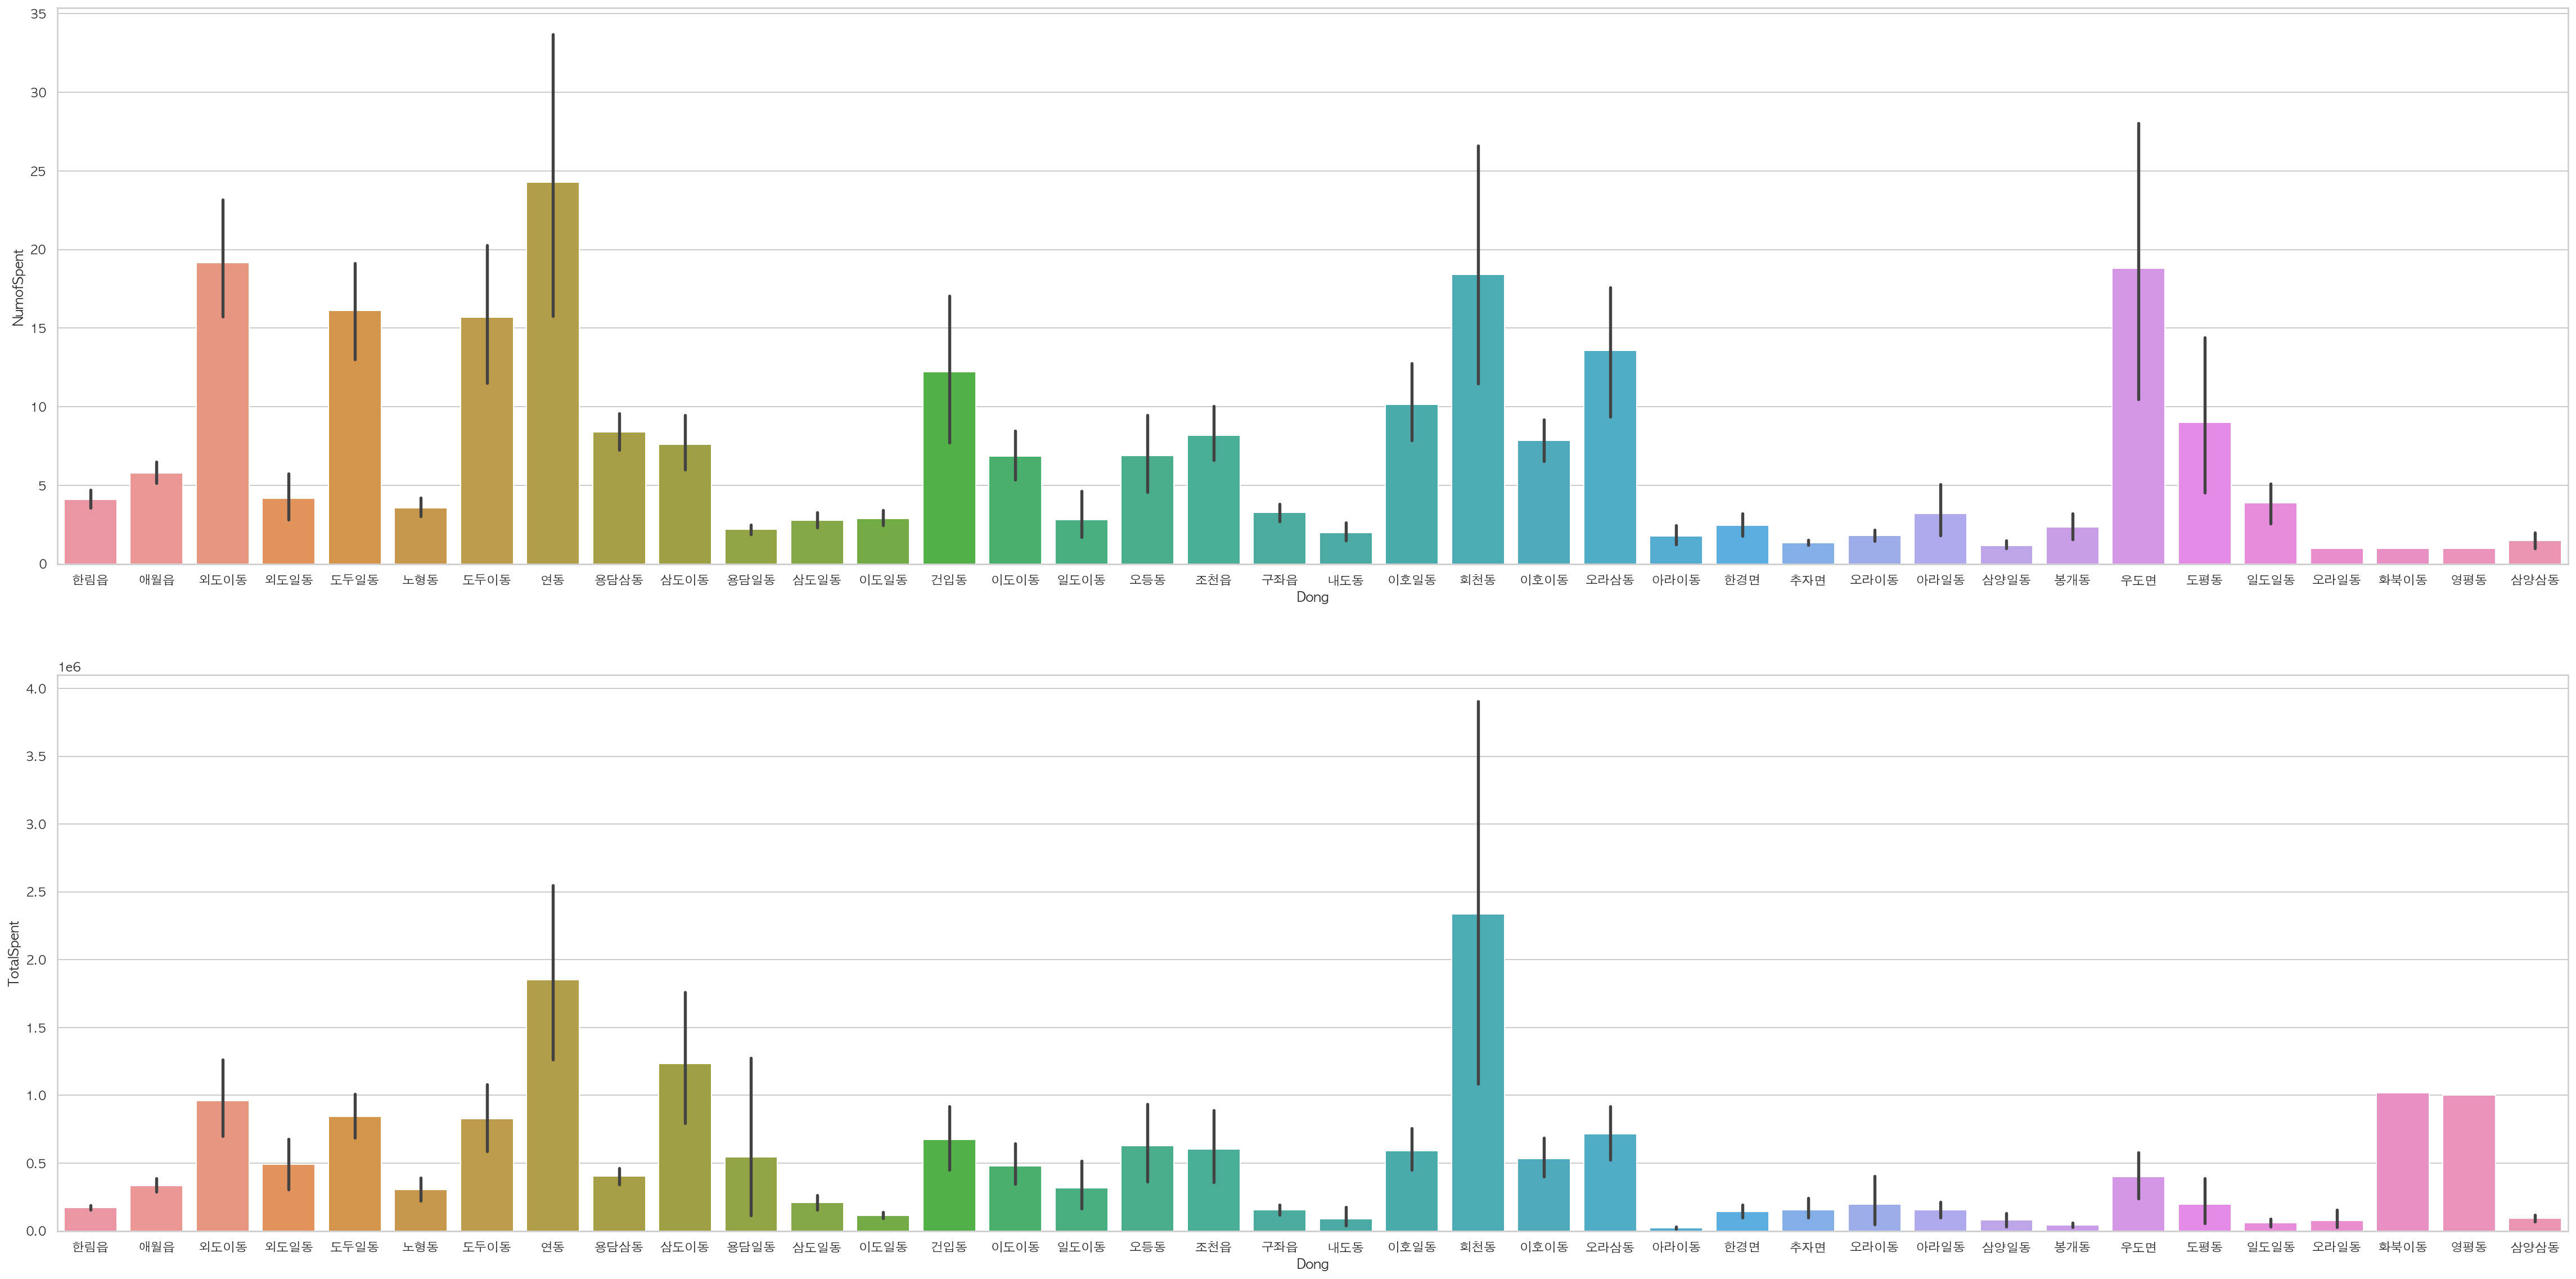

In [13]:
# '용담이동'을 제외한 나머지 제주시 동별 NumofSpent, TotalSpent
yongdam2_index = jejusi.index[jejusi['Dong'] == '용담이동'].tolist()
drop_yongdam2_df = pd.DataFrame(columns=jejusi.columns, data=jejusi.drop(index=yongdam2_index))

sns.set(rc={'axes.unicode_minus':False}, font='AppleGothic', style='whitegrid')
fig, axes = plt.subplots(2,1, figsize=(40,20))

sns.barplot(ax=axes[0], x='Dong', y='NumofSpent', data=drop_yongdam2_df)
sns.barplot(ax=axes[1], x='Dong', y='TotalSpent', data=drop_yongdam2_df)
plt.show()

- 공항주변

In [21]:
# 제주시 관광객 소비 기준 읍,면,동 개수
df_jeju_dong, len(df_jeju_dong)

(      NumofSpent
 Dong            
 건입동          229
 구좌읍          255
 내도동           34
 노형동          252
 도두이동         185
 도두일동         209
 도평동           27
 봉개동            9
 삼도이동         370
 삼도일동         196
 삼양삼동           2
 삼양일동           6
 아라이동          13
 아라일동          20
 애월읍          841
 연동          1040
 영평동            1
 오등동           19
 오라삼동          33
 오라이동          20
 오라일동           3
 외도이동          59
 외도일동          16
 용담삼동         261
 용담이동         472
 용담일동         120
 우도면           63
 이도이동         123
 이도일동         199
 이호이동          64
 이호일동         113
 일도이동         101
 일도일동           9
 조천읍          370
 추자면           49
 한경면           63
 한림읍          404
 화북이동           1
 회천동           28,
 39)

In [17]:
import json
with open('../datas/TL_SCCO_EMD.json', 'rb') as fin:
    json_data = json.load(fin)

In [20]:
jeju_guest_dong = df_jeju_dong.index.tolist() # 제주 관광객 소비기준 동개수
# map_districts = [json_data['features'][i]['properties']['EMD_KOR_NM'] for i in range(len(json_data['features']))]
# map_list = list(set(map_districts)) # 행정구역 읍면동

# districts_len = len(map_list)
# real_json = {'type': 'FeatureCollection', 'features': []}

# for i in range(districts_len):
#     if map_list[i] in jeju_guest_dong:
#         real_json['features'].append(json_data['features'][i])
        
# map_list

In [183]:
# real_json # 읍면동 변경

In [19]:
df_jeju_dong = pd.DataFrame(jejusi.groupby(['Dong'])['NumofSpent'].count())
df_jeju_dong.head()

,NumofSpent
Dong,
건입동,229
구좌읍,255
내도동,34
노형동,252
도두이동,185


In [23]:
indexlist = emd.index.tolist()
targets = []

for i in range(len(jeju_guest_dong)):
    if jeju_guest_dong[i] in emd['EMD_KOR_NM'].tolist():
        target_index = emd[i:i+1].index.tolist()
        targets.append(target_index[0])

In [24]:
emd = emd.loc[targets]
emd.tail(3)

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
36,50110139,Haean-dong,해안동,"POLYGON ((903445.96095 1498109.30338, 902016.3..."
37,50110140,Naedo-dong,내도동,"POLYGON ((902194.10572 1501170.18303, 901150.6..."
38,50110250,Hallim-eup,한림읍,"POLYGON ((888258.95930 1495619.12899, 886409.2..."


In [266]:
# 제주시 11개 관광업종 분석

jeju_emd = emd.loc[(emd['EMD_CD'].str.startswith('5011')|emd['EMD_CD'].str.startswith('5013'))]

jeju_emd['geometry'] = jeju_emd['geometry'].to_crs('EPSG:4326')
f = folium.Figure(width=600, height=400)

m = folium.Map(location = [33.363, 126.533], zoom_start= 11)
m.add_to(f)

folium.Choropleth(
            geo_data=jeju_emd, 
            data = df_jeju_dong['NumofSpent'],
            key_on = 'feature.properties.EMD_KOR_NM',
            columns = (df_jeju_dong.index,df_jeju_dong['NumofSpent']),
            fill_color = 'BuPu',
            fill_opacity=0.6,
            line_opacity=1,
            overlays = True,
            highlight=True
         ).add_to(m)

m

----
<strong>위도, 경도를 주소로 변환</strong>
- reverse geocoding

In [398]:
# api key 호출
def get_secretKeys():
    
    file = open("../keys/secret_keys.txt", "rt")
    split_keys = []
    line_count = 0
    
    load_datas = file.readlines()
    
    file.close()
    
    for i in range(len(load_datas)):
        split_keys.append(load_datas[i].split('=')[1].replace('"', ""))
    
    return split_keys


# api 요청 url 생성
def get_search_url(req_x, req_y):
    
    api_list = get_secretKeys()
    
    base = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json"     
    header_phrase = "KakaoAK"
    api_key = api_list[1] 
    
    
    headers = {"Authorization": header_phrase + api_key[1:]} # api_key[1:] = 공백 제거
    
    req_lat = "?x=" + str(req_x)
    req_lng = "&y=" + str(req_y)
    
    url = base + req_lat + req_lng
    req_set = (url, headers)
    
    return req_set

def get_result(url, header):
    
    req = requests.get(url, headers=header)
    res = json.loads(req.text)
     
    return res


# 변환된 위도,경도를 주소로 요청
def reverse_geocoding(req_x, req_y):

    req_set = get_search_url(req_x, req_y)
    res_api = get_result(req_set[0], req_set[1])
    
    return res_api


# reverse geocoding start
proj_x = [jejusi['Proj_X'].tolist()]
proj_y = [jejusi['Proj_Y'].tolist()]

res_json = []

for i in range(len(proj_x[0])):
    try:
        raw_res_json = reverse_geocoding(proj_x[0][i], proj_y[0][i])
        res_json.append(raw_res_json['documents'][0]['region_3depth_name'])
    except:
        res_json.append('')

        
jejusi['Dong'] = res_json
jejusi.to_csv('../datas/guest_consumptionType_jejusi.csv', encoding='utf-8-sig')

6317

----
<strong>제주시 11개 관광업종 좌표 변환</strong>
- 기존 ITRF2000 좌표계 표준 위도, 경도로 변환

In [31]:
sigungu_2.reset_index(inplace=True, drop=True)

# 좌표 변환
def change_lat_lng(path_x, path_y):
    
    itrf_x, itrf_y = path_x, path_y
    
    proj_UTMK = Proj(init='epsg:5178') #기존 좌표계: ITRF2000
    proj_WGS84 = Proj(init='epsg:4326') #변환할 좌표계
    
    x, y = transform(proj_UTMK, proj_WGS84, itrf_x, itrf_y)
    latlng = (x, y)
    
    return latlng

raw_xy = sigungu_2[['POINT_X', 'POINT_Y']]
raw_xy

# ITRF2000 좌표계 좌표
def get_transform_xy(raw_xy):
    
    transform_xy = []
    latlng_df = raw_xy
    
    for i in range(len(latlng_df)):
        raw_x = latlng_df['POINT_X'].iloc[i]
        raw_y = latlng_df['POINT_Y'].iloc[i]

        res = change_lat_lng(raw_x, raw_y)
        transform_xy.append(res)

    return transform_xy


raw_xy = sigungu_2[['POINT_X', 'POINT_Y']]
res_latlng = get_transform_xy(raw_xy)

get_x, get_y = [], []

for i in range(len(res_latlng)):
    x = str(res_latlng[i][0])
    y = str(res_latlng[i][1])
    
    get_x.append(x)
    get_y.append(y)
    

sigungu_2['Proj_X'] = get_x
sigungu_2['Proj_Y'] = get_y

sigungu_2.to_csv("../datas/guest_consumptionType_jejusi.csv", encoding='utf-8-sig')

NameError: name 'hotel_spent' is not defined